### Устанавливаем библиотеки

In [1]:
!pip install deap
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Импортируем библиотеки

In [2]:
import random
import numpy as np

import matplotlib.pyplot as plt
from deap import algorithms, base, creator, tools

### Создаем классы FitnessMax и Individual

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

### Инициализация

In [4]:
toolbox = base.Toolbox()
toolbox.register("indices", random.randint, 0, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.indices, 7)

### Отбор

In [5]:
toolbox.register("select", tools.selTournament, tournsize=3) # Турнирный отбор

### Скрещивание/Кроссовер

In [6]:
toolbox.register("mate", tools.cxOnePoint) # Одноточечный

### Мутация

In [7]:
# Меняет на противоположное значение ген
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

### Определение популяции

In [8]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

### Регистрация фитнес-функции

In [9]:
def eval_one_max(individual):
    """
    Количество элементов = 1 (истина)
    """
    return sum(individual),

toolbox.register("evaluate", eval_one_max)

### Определение зала славы и статистики

In [10]:
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

### Запуск генетического алгоритма

In [11]:
pop = toolbox.population(n=300)

ngen = 300
mu = 100
lambda_ = 100
cxpb = 0.5
mutpb = 0.3

pop, log = algorithms.eaMuPlusLambda(
    pop,
    toolbox,
    mu=mu,
    lambda_=lambda_,
    cxpb=cxpb,
    mutpb=mutpb,
    ngen=ngen,
    stats=stats,
    verbose=True,
    halloffame=hof,
) # Стратегия (μ+λ)

gen	nevals	avg  	std    	min	max
0  	300   	17.77	4.61488	5  	30 
1  	80    	21.78	3.55972	13 	30 
2  	78    	24.96	3.42905	19 	34 
3  	80    	28.06	2.70858	22 	34 
4  	77    	30.25	2.42642	25 	34 
5  	83    	32.04	1.8051 	28 	34 
6  	82    	33.61	0.84729	30 	35 
7  	84    	34.03	0.221585	33 	35 
8  	78    	34.14	0.346987	34 	35 
9  	77    	34.4 	0.489898	34 	35 
10 	79    	34.79	0.407308	34 	35 
11 	75    	35   	0       	35 	35 
12 	81    	35   	0       	35 	35 
13 	81    	35   	0       	35 	35 
14 	80    	35   	0       	35 	35 
15 	77    	35   	0       	35 	35 
16 	80    	35   	0       	35 	35 
17 	86    	35   	0       	35 	35 
18 	84    	35   	0       	35 	35 
19 	75    	35   	0       	35 	35 
20 	82    	35   	0       	35 	35 
21 	84    	35   	0       	35 	35 
22 	82    	35   	0       	35 	35 
23 	78    	35   	0       	35 	35 
24 	79    	35   	0       	35 	35 
25 	84    	35   	0       	35 	35 
26 	75    	35   	0       	35 	35 
27 	82    	35   	0       	35 	35 
28 	85    	35   	0    

### Итоговая популяция

In [12]:
for p in pop:
    print(p)

length = len(pop)
print(f'\nLength: {length}')

[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 

### Лучшая особь

In [13]:
best_ind = tools.selBest(pop, length)[length-1]
print(f'Лучшая особь: {best_ind}, {best_ind.fitness.values}')

Лучшая особь: [5, 5, 5, 5, 5, 5, 5], (35.0,)


### График изменения среднего значения от генерации

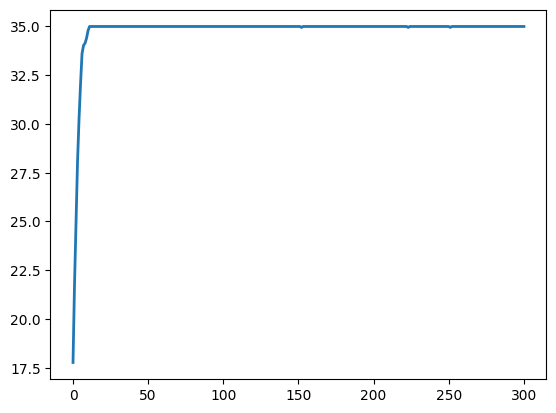

In [14]:
means = [log_item['avg'] for log_item in log]
plt.plot(range(len(means)), means, linewidth=2.0)